In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the required libraries

In [ ]:
import json
import librosa
import numpy as np
import librosa.display
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import scipy.io.wavfile
import pandas as pd
import keras
from keras.preprocessing import sequence
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical, np_utils
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from keras import regularizers
import glob
import sys
import os

Using TensorFlow backend.


In [ ]:
from keras import regularizers

In [ ]:
import os

In [ ]:
mylist= os.listdir('/content/drive/My Drive/Project Data/All/RawData/')
mylist.pop()

'03-01-04-02-01-01-08.wav'

In [ ]:
for item in mylist:
  if item == '.ipynb_checkpoints':
    mylist.remove('.ipynb_checkpoints')

In [ ]:
type(mylist)

list

In [ ]:
print(mylist[180])

03-01-02-01-02-02-11.wav


In [ ]:
print(mylist[400][6:-16])

01


## Plotting the audio file's waveform and its spectrogram

In [ ]:
data, sampling_rate = librosa.load('/content/drive/My Drive/Project Data/All/SAVEE/DC/a12.wav')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


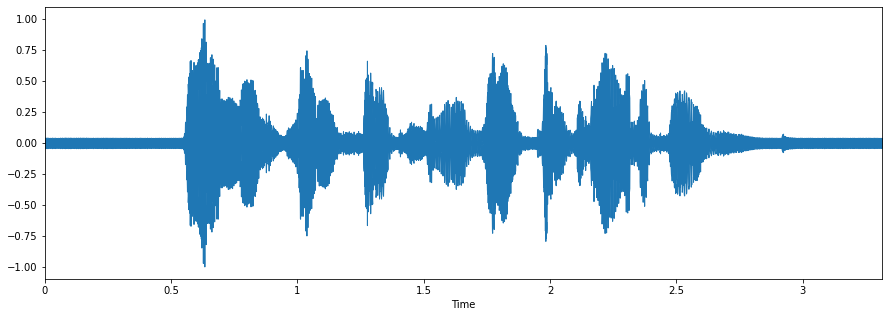

In [ ]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

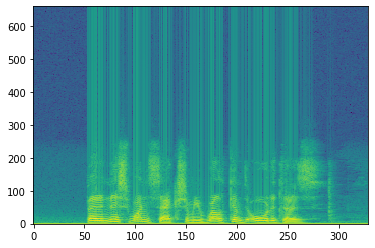

In [ ]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('/content/drive/My Drive/Project Data/All/SAVEE/DC/a12.wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

## Setting the labels

In [ ]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')
    elif item[:1]=='a':
        feeling_list.append('male_angry')
    elif item[:1]=='f':
        feeling_list.append('male_fearful')
    elif item[:1]=='h':
        feeling_list.append('male_happy')
    #elif item[:1]=='n':
        #feeling_list.append('neutral')
    elif item[:2]=='sa':
        feeling_list.append('male_sad')

In [ ]:
labels = pd.DataFrame(feeling_list)

In [ ]:
labels[:10]

,0
0,female_calm
1,female_happy
2,female_calm
3,female_sad
4,female_calm
5,female_fearful
6,female_fearful
7,female_happy
8,female_calm
9,female_fearful


## Getting the features of audio files using librosa

In [ ]:
for x in mylist:
  print(x)

03-01-02-02-01-02-08.wav
03-01-03-01-01-01-08.wav
03-01-02-01-02-01-08.wav
03-01-04-01-02-02-08.wav
03-01-02-01-02-02-08.wav
03-01-06-02-01-01-08.wav
03-01-06-02-01-02-08.wav
03-01-03-02-01-01-08.wav
03-01-02-02-02-02-08.wav
03-01-06-01-01-02-08.wav
03-01-04-01-01-02-08.wav
03-01-06-01-01-01-08.wav
03-01-04-02-02-01-08.wav
03-01-07-01-01-02-08.wav
03-01-03-02-02-02-08.wav
03-01-04-01-02-01-08.wav
03-01-05-01-02-01-08.wav
03-01-03-01-02-01-08.wav
03-01-03-02-02-01-08.wav
03-01-06-01-02-02-08.wav
03-01-05-02-01-02-08.wav
03-01-05-01-01-01-08.wav
03-01-05-02-02-01-08.wav
03-01-06-02-02-02-08.wav
03-01-05-01-01-02-08.wav
03-01-01-01-01-01-09.wav
03-01-02-01-02-02-09.wav
03-01-01-01-02-01-09.wav
03-01-03-01-02-02-09.wav
03-01-03-02-01-01-09.wav
03-01-04-01-02-02-09.wav
03-01-08-02-02-01-08.wav
03-01-03-01-02-01-09.wav
03-01-02-02-02-01-09.wav
03-01-03-02-02-01-09.wav
03-01-08-02-01-01-08.wav
03-01-02-02-01-01-09.wav
03-01-07-01-02-02-08.wav
03-01-08-01-02-02-08.wav
03-01-07-02-01-01-08.wav


In [ ]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][:2]!='su' and mylist[index][:1]!='n' and mylist[index][:1]!='d':
        X, sample_rate = librosa.load('/content/drive/My Drive/Project Data/All/RawData/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
        feature = mfccs
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1        

In [ ]:
df[:5]

,feature
0,"[-57.41907359852529, -56.39508574920318, -56.2..."
1,"[-61.14695022255085, -56.287819309288516, -53...."
2,"[-62.29893041247635, -58.11708971201477, -52.5..."
3,"[-57.377064978383615, -55.36481464099381, -51...."
4,"[-55.309755234571746, -53.13562724374954, -53...."


In [ ]:
df3 = pd.DataFrame(df['feature'].values.tolist())

df3[:5]

In [ ]:
newdf = pd.concat([df3,labels], axis=1)

In [ ]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [ ]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,0
0,-57.419074,-56.395086,-56.257063,-59.741595,-57.384630,-54.281604,-54.191507,-54.635123,-52.556227,-55.164894,-56.936224,-54.938996,-58.701802,-57.877451,-54.855523,-54.215462,-55.805785,-54.460800,-53.343635,-54.512858,-53.901406,-57.932235,-58.071641,-58.066674,-57.999087,-56.361134,-53.162384,-52.085602,-52.013412,-49.924483,-51.885808,-56.996503,-56.778097,-55.023937,-54.546373,-54.046904,-53.910593,-52.808142,-50.160924,-51.619772,...,-36.643174,-37.808262,-36.932534,-38.301023,-38.383302,-38.196142,-38.663159,-38.074060,-38.760334,-38.306712,-38.854753,-39.276983,-38.948214,-37.490363,-35.040155,-34.242845,-33.713437,-33.358994,-33.199390,-33.840625,-35.342209,-36.789058,-37.611644,-38.361174,-38.980429,-42.022509,-42.757566,-43.883009,-44.848377,-44.998191,-43.823186,-44.360895,-46.601958,-49.350355,-50.284475,-51.319139,-50.436920,-51.523939,-52.426379,female_calm
1,-61.146950,-56.287819,-53.293825,-54.793775,-55.336943,-54.026506,-53.743365,-51.804522,-52.742723,-53.390527,-56.241216,-55.400222,-52.488820,-50.794205,-51.082589,-51.393007,-51.194340,-53.736897,-53.668146,-54.775504,-58.309148,-54.998000,-52.069283,-52.534906,-54.759170,-52.465741,-51.927041,-48.721728,-47.583615,-49.349246,-49.024686,-50.065592,-52.140131,-54.588068,-56.735233,-53.514214,-53.033300,-54.018223,-54.388557,-53.277240,...,-39.115454,-41.727550,-41.053509,-39.843916,-40.209123,-39.981455,-41.601303,-43.578580,-44.074954,-44.588738,-45.499669,-47.568167,-46.168453,-45.531689,-47.027950,-51.250861,-48.173319,-47.436341,-49.397236,-49.313832,-50.234566,-47.840201,-47.667066,-49.523013,-50.627769,-52.167106,-49.454583,-48.736049,-49.679325,-52.190208,-52.629764,-52.047206,-51.128754,-52.475758,-53.598834,-54.731001,-55.910104,-54.097705,-51.990899,female_happy
2,-62.298930,-58.117090,-52.514487,-49.665774,-50.454321,-52.708807,-52.650165,-51.722148,-51.405099,-55.263349,-56.825550,-53.257763,-52.634785,-52.847732,-51.433080,-50.243416,-49.438254,-49.673592,-52.262913,-54.521225,-60.114948,-55.432471,-54.430929,-54.115918,-52.321819,-53.637581,-53.361811,-55.103772,-55.114713,-53.304426,-55.354968,-55.593480,-54.170523,-52.519152,-54.568213,-52.104940,-50.949339,-51.977698,-52.314503,-52.124418,...,-35.054922,-38.374907,-40.312570,-42.774118,-41.842352,-40.418722,-42.013041,-44.026417,-45.881784,-47.347494,-47.034577,-47.151247,-45.390696,-46.859672,-49.008412,-49.407763,-50.540449,-50.839817,-50.324319,-51.010339,-50.367275,-50.058933,-51.886418,-50.714978,-51.614204,-49.697684,-51.237484,-51.905410,-52.749809,-56.397871,-56.931351,-53.773379,-54.971037,-54.666141,-52.075011,-51.310909,-53.125411,-53.229084,-52.692552,female_calm
3,-57.377065,-55.364815,-51.757781,-51.642063,-50.936552,-53.281258,-53.649365,-53.964395,-56.714448,-57.512045,-56.830369,-57.256833,-55.430272,-57.002909,-55.105490,-54.155596,-55.467617,-54.096654,-54.216058,-55.087594,-56.438032,-54.487595,-53.661679,-51.883621,-52.618373,-51.714676,-51.677547,-52.954593,-53.269949,-54.432915,-55.428124,-56.300974,-55.477517,-53.982051,-53.840145,-53.374726,-52.896861,-55.620393,-57.319908,-53.956077,...,-49.090763,-49.197212,-51.814195,-51.742708,-52.196965,-52.171457,-52.474754,-53.405493,-50.943598,-51.045044,-51.934156,-52.259989,-51.316631,-51.553858,-50.259602,-51.982137,-52.007969,-49.873691,-50.307845,-48.586871,-52.007455,-54.268292,-52.448849,-52.222381,-51.588513,-50.673625,-52.764984,-52.614900,-50.842557,-53.607920,-53.272260,-52.861200,-52.425885,-52.243763,-53.530232,-52.977942,-51.750201,-52.356893,-55.265880,female_sad
4,-55.309755,-53.135627,-53.411575,-53.746281,-52.089333,-52.538318,-52.818341,-52.520157,-54.157408,-56.611049,-57.585999,-54.323423,-53.677537,-55.580659,-52.641649,-51.627422,-

In [ ]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,0
902,-40.386229,-40.550886,-39.979264,-38.504508,-39.087077,-39.799554,-40.708923,-40.157821,-40.237576,-41.582842,-39.998866,-38.727031,-39.101161,-42.172442,-40.543847,-40.150609,-40.562147,-39.894236,-39.947606,-40.243110,-41.439392,-39.704929,-37.326421,-37.418614,-38.434206,-39.388237,-40.614368,-42.012160,-43.318373,-43.501985,-40.651373,-40.039880,-41.579518,-41.217929,-41.464132,-42.129526,-42.070739,-41.646427,-41.056382,-40.743868,...,-35.964228,-36.765063,-36.436704,-36.238188,-36.773549,-39.024898,-40.326233,-40.663225,-41.663349,-42.812075,-42.853510,-43.083712,-44.906246,-39.204798,-35.745036,-33.207512,-30.479573,-30.394673,-29.928361,-29.699149,-30.638276,-31.589946,-34.216177,-35.228128,-32.742045,-33.552915,-36.324037,-37.581718,-37.349428,-37.574583,-38.580385,-37.227376,-37.496996,-37.820792,-38.419062,-40.801215,-40.612727,-40.212500,-38.062599,female_fearful
491,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,-64.176734,...,-41.591954,-45.576024,-44.647931,-45.055488,-46.970112,-47.250995,-47.963617,-48.162981,-45.767196,-45.218883,-45.954004,-47.089095,-45.249643,-44.855441,-46.532776,-43.186586,-40.648443,-41.098033,-42.537684,-44.820111,-45.403329,-47.176140,-51.854655,-50.830460,-52.152562,-53.185850,-56.147224,-58.302483,-59.357417,-58.868192,-58.210467,-60.469254,-62.210719,-62.129736,-63.643382,-64.176734,-61.997287,-61.251631,-58.764049,female_fearful
438,-49.650129,-50.190398,-50.976834,-51.068006,-51.623965,-51.873101,-52.943504,-53.552563,-51.887531,-51.599003,-50.706072,-50.097848,-50.898358,-52.254035,-51.802917,-52.022070,-51.706792,-44.297155,-41.163796,-43.713578,-46.811478,-45.323336,-44.384362,-44.472455,-45.950304,-47.836921,-47.961797,-47.107708,-46.241347,-45.869970,-45.664772,-45.640952,-45.016275,-44.328362,-45.182125,-46.679159,-46.507476,-44.363467,-43.508601,-42.748814,...,-23.218483,-23.088674,-23.636483,-24.794824,-28.474600,-29.063736,-28.333812,-27.469574,-28.625111,-28.560632,-30.209537,-29.099109,-29.540561,-31.121418,-33.776986,-34.814650,-34.388423,-33.571873,-34.521483,-36.424970,-37.550873,-36.469633,-36.706681,-37.972801,-37.946483,-37.724888,-38.573825,-41.262666,-42.863628,-43.604423,-44.173772,-44.832886,-47.194764,-45.137010,-44.643775,-46.524570,-48.391472,-47.425131,-45.681588,male_angry
165,-57.419633,-57.696347,-58.593154,-58.173707,-56.816082,-57.052646,-56.534252,-55.248651,-54.070975,-53.961269,-54.618917,-56.226931,-55.089840,-54.403778,-54.920646,-53.753775,-52.505940,-52.039335,-52.409841,-50.631839,-50.063720,-50.575519,-49.158139,-47.644498,-47.846843,-45.622139,-46.634789,-47.078918,-46.517099,-47.164990,-47.792750,-47.615480,-45.989654,-46.200860,-45.294168,-44.281879,-46.526800,-46.590593,-47.559325,-48.059941,...,-45.414119,-44.945637,-45.105071,-46.347076,-47.619055,-47.515578,-46.509541,-45.971336,-45.355940,-45.271824,-46.215144,-47.527206,-47.254174,-48.587440,-51.007193,-51.633489,-50.934721,-53.212808,-54.465571,-54.886086,-55.873480,-55.336453,-54.020247,-55.242883,-55.582005,-54.791061,-53.258170,-52.660028,-52.840534,-51.863146,-50.393697,-50.474974,-51.069885,-52.064431,-54.821356,-55.741497,-54.562802,-53.602407,-53.358295,female_fearful
365,-45.581570,-47.020933,-47.184083,-47.208292,-47.210128,-48.555902,-48.161397,-48.230024,-48.932639,-48.314510,-46.822906,-46.146333,-46.371581,-45.541463,-45.8

In [ ]:
rnewdf=rnewdf.fillna(0)

## Dividing the data into test and train

In [ ]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [ ]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,0
644,-60.209713,-61.792752,-57.893066,-54.121386,-51.305815,-47.766928,-47.981797,-48.230982,-48.983189,-49.097779,-47.153883,-49.457689,-52.954874,-54.824491,-53.909679,-52.651705,-51.983817,-51.685073,-51.395780,-52.816424,-56.215944,-58.188573,-58.431473,-58.795785,-58.632466,-58.500990,-58.583478,-58.704938,-56.758840,-55.834192,-54.782937,-53.650222,-55.238317,-55.484407,-53.932627,-51.750858,-51.638011,-54.073759,-51.721602,-52.596223,...,-39.223793,-38.618365,-37.171334,-36.250253,-37.437811,-36.783909,-36.075855,-37.542469,-36.542438,-38.876862,-39.783790,-40.708330,-40.314862,-38.804053,-38.810577,-40.349788,-41.591260,-42.659837,-44.906968,-34.105680,-28.671283,-28.091412,-33.220456,-37.317326,-37.694504,-36.742027,-36.260625,-37.660609,-38.030109,-38.770720,-40.692319,-37.988591,-37.762255,-39.635747,-39.829458,-37.223745,-36.612776,-29.627530,-23.944250,female_sad
135,-50.964074,-51.055343,-50.161934,-49.445613,-48.142321,-48.987169,-49.597666,-50.091249,-51.882130,-52.769373,-53.804528,-55.548533,-51.978056,-51.544881,-50.406102,-49.379997,-49.323760,-53.927564,-53.503914,-50.453439,-50.614185,-51.059963,-51.254148,-52.467597,-56.614452,-54.177487,-50.491467,-50.913026,-50.416799,-52.210380,-54.030947,-51.107854,-51.598184,-49.212478,-46.862169,-43.492703,-41.566475,-43.224681,-44.873247,-47.062269,...,-22.110251,-23.154655,-23.373817,-23.409362,-22.883987,-22.233235,-22.564606,-23.710655,-26.434617,-30.347242,-31.429763,-31.183892,-33.789789,-35.909645,-37.593412,-39.819516,-40.464518,-41.613220,-43.457878,-41.838710,-41.855353,-42.714402,-45.349453,-45.187912,-43.953878,-43.662139,-44.870750,-45.880497,-45.337132,-44.489602,-45.891257,-47.636867,-47.571589,-46.952797,-46.232749,-48.275468,-49.561485,-51.537453,-52.164134,male_angry
535,-58.416270,-58.416270,-58.416270,-57.573445,-57.402440,-58.283530,-59.001954,-55.797078,-58.000678,-56.934552,-55.917388,-53.892611,-53.543964,-53.984964,-54.485334,-54.077345,-54.071042,-54.314154,-54.193392,-53.383621,-53.197825,-52.439084,-52.641252,-53.458396,-55.380741,-52.995448,-50.762669,-53.031667,-54.249507,-53.173118,-53.370656,-55.786962,-57.349689,-56.384052,-57.169628,-58.308211,-58.416270,-56.145441,-49.560307,-48.285699,...,-24.870667,-24.519197,-22.026234,-19.000557,-18.517754,-18.728357,-20.109716,-21.482273,-21.478164,-20.634816,-20.804658,-21.064199,-21.358448,-21.640618,-24.715792,-25.247718,-25.757402,-25.705442,-27.639698,-29.000740,-29.564148,-29.966296,-29.508393,-30.989014,-32.390231,-32.035662,-32.923095,-32.514104,-34.952668,-35.210396,-35.375331,-36.822361,-40.088500,-37.593660,-38.732343,-40.107168,-41.780195,-41.634849,-42.437048,male_happy
951,-55.193142,-55.723884,-56.979527,-60.773302,-55.671585,-53.729587,-53.668486,-53.156350,-54.001936,-55.969090,-54.019745,-52.618911,-51.980924,-52.415000,-55.612426,-61.926134,-55.770590,-51.722128,-53.556623,-57.321047,-56.993728,-54.170543,-53.823496,-53.005591,-51.422479,-47.916565,-49.441284,-50.678900,-49.176924,-50.408167,-51.236318,-50.063740,-50.560357,-52.099679,-53.444128,-52.753478,-55.172348,-57.542250,-58.679712,-55.666418,...,-32.725538,-32.970856,-32.895867,-33.084956,-33.676264,-31.995787,-31.388594,-32.188074,-31.761316,-31.405110,-31.382574,-31.908150,-30.771876,-33.167390,-35.698280,-37.978352,-39.884649,-39.339318,-40.565307,-43.239917,-43.282186,-44.401725,-47.267833,-46.880006,-49.174371,-47.886164,-48.811594,-47.898962,-48.573389,-51.378706,-52.854714,-49.178707,-49.217065,-50.817701,-50.598227,-50.945154,-50.485628,-51.919373,-52.982166,female_calm
87,-50.122292,-47.303445,-47.406759,-47.755926,-45.778542,-45.284749,-45.975471,-47.275413,-48.067036,-47.671568,-45.421413,-46.259565,-47.076748,-48.762744,-47.874474,-46.86

In [ ]:
trainfeatures = train.iloc[:, :-1]

In [ ]:
trainlabel = train.iloc[:, -1:]

In [ ]:
testfeatures = test.iloc[:, :-1]

In [ ]:
testlabel = test.iloc[:, -1:]

In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train.shape

(766, 216)

## Changing dimension for CNN model

In [ ]:

x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [ ]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 216, 256)          1536      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
activation_2 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 27, 128)          

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

### Removed the whole training part for avoiding unnecessary long epochs list

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=32, epochs=500, validation_data=(x_testcnn, y_test))

Train on 766 samples, validate on 193 samples
Epoch 1/500
766/766 [==============================] - 6s 8ms/step - loss: 2.3998 - accuracy: 0.1188 - val_loss: 2.2924 - val_accuracy: 0.1451
Epoch 2/500
766/766 [==============================] - 5s 7ms/step - loss: 2.3341 - accuracy: 0.1070 - val_loss: 2.2786 - val_accuracy: 0.1658
Epoch 3/500
766/766 [==============================] - 5s 7ms/step - loss: 2.3317 - accuracy: 0.1031 - val_loss: 2.2647 - val_accuracy: 0.1606
Epoch 4/500
766/766 [==============================] - 6s 7ms/step - loss: 2.2907 - accuracy: 0.1201 - val_loss: 2.2601 - val_accuracy: 0.1917
Epoch 5/500
766/766 [==============================] - 6s 7ms/step - loss: 2.2876 - accuracy: 0.1332 - val_loss: 2.2473 - val_accuracy: 0.2176
Epoch 6/500
766/766 [==============================] - 6s 7ms/step - loss: 2.2719 - accuracy: 0.1253 - val_loss: 2.2363 - val_accuracy: 0.2383
Epoch 7/500
766/766 [==============================] - 6s 7ms/step - loss: 2.2555 - accuracy: 0.

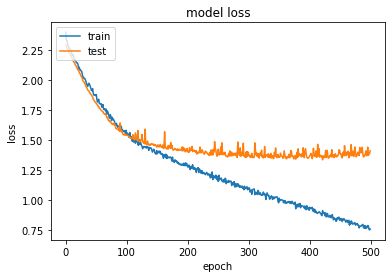

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Saving the model

In [ ]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/Emotion_Voice_Detection_Model.h5 


In [ ]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

## Loading the model

In [ ]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 49.74%


## Predicting emotions on the test data

In [ ]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

193/193 [==============================] - 0s 2ms/step


In [ ]:
preds

array([[7.3705572e-03, 7.6999977e-02, 2.3647529e-01, ..., 9.7476988e-04,
        3.0420205e-04, 1.8997649e-03],
       [3.8805946e-03, 7.5508332e-01, 4.6290509e-02, ..., 9.4424392e-04,
        5.1775615e-04, 4.9971202e-03],
       [2.5731907e-04, 2.7190856e-04, 6.0645862e-06, ..., 2.6616645e-01,
        7.3134847e-02, 5.0301486e-01],
       ...,
       [2.2756668e-02, 4.3685752e-01, 2.0291930e-02, ..., 3.6838461e-02,
        1.2701580e-02, 6.9413714e-02],
       [2.5068623e-01, 3.2292656e-04, 1.9558542e-03, ..., 3.1856589e-02,
        2.7954623e-01, 3.1057277e-01],
       [2.6289423e-03, 4.1602550e-05, 1.4612229e-03, ..., 9.0794124e-02,
        8.7664239e-02, 3.2345551e-01]], dtype=float32)

In [ ]:
preds1=preds.argmax(axis=1)

In [ ]:
preds1

array([3, 1, 9, 9, 9, 2, 6, 5, 7, 0, 8, 3, 0, 9, 8, 3, 6, 7, 6, 9, 0, 0,
       2, 4, 6, 6, 4, 0, 1, 8, 5, 4, 7, 8, 5, 1, 2, 6, 1, 5, 3, 0, 4, 7,
       7, 1, 2, 2, 6, 8, 0, 7, 2, 6, 6, 1, 0, 0, 8, 3, 3, 0, 6, 9, 0, 2,
       2, 5, 2, 8, 1, 1, 4, 6, 1, 0, 6, 0, 9, 5, 1, 1, 0, 8, 0, 3, 3, 5,
       6, 4, 3, 8, 7, 1, 5, 5, 3, 0, 8, 7, 0, 6, 5, 1, 7, 4, 0, 4, 1, 2,
       0, 7, 3, 7, 0, 0, 5, 1, 0, 9, 6, 9, 5, 2, 7, 5, 1, 7, 8, 7, 1, 6,
       4, 6, 1, 2, 6, 5, 7, 8, 0, 9, 0, 9, 1, 0, 5, 2, 6, 5, 5, 5, 4, 0,
       4, 5, 4, 5, 1, 3, 3, 5, 8, 0, 4, 4, 2, 8, 6, 2, 1, 0, 9, 6, 9, 0,
       6, 6, 3, 9, 5, 3, 5, 9, 4, 6, 7, 4, 4, 4, 1, 9, 9])

In [ ]:
abc = preds1.astype(int).flatten()

In [ ]:
predictions = (lb.inverse_transform((abc)))

In [ ]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,female_happy
1,female_calm
2,male_sad
3,male_sad
4,male_sad
5,female_fearful
6,male_calm
7,male_angry
8,male_fearful
9,female_angry


In [ ]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [ ]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,female_fearful
1,female_calm
2,male_sad
3,male_sad
4,male_happy
5,female_fearful
6,male_sad
7,male_angry
8,female_happy
9,female_angry


In [ ]:
finaldf = actualdf.join(preddf)

## Actual v/s Predicted emotions

In [ ]:
finaldf[170:180]

,actualvalues,predictedvalues
170,female_sad,female_calm
171,male_sad,female_angry
172,male_fearful,male_sad
173,male_calm,male_calm
174,male_happy,male_sad
175,male_sad,female_angry
176,male_happy,male_calm
177,male_calm,male_calm
178,female_sad,female_happy
179,male_calm,male_sad


In [ ]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_angry,19
female_calm,23
female_fearful,20
female_happy,22
female_sad,16
male_angry,15
male_calm,21
male_fearful,15
male_happy,19


In [ ]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,29
female_calm,22
female_fearful,15
female_happy,15
female_sad,18
male_angry,23
male_calm,24
male_fearful,16
male_happy,14


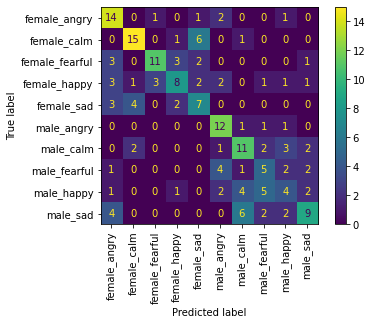

In [ ]:
cm = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues, labels=['female_angry', 'female_calm', 'female_fearful', 'female_happy', 'female_sad', 'male_angry', 'male_calm', 'male_fearful', 'male_happy', 'male_sad'])
cmdisplay = ConfusionMatrixDisplay(cm, display_labels=['female_angry', 'female_calm', 'female_fearful', 'female_happy', 'female_sad', 'male_angry', 'male_calm', 'male_fearful', 'male_happy', 'male_sad'])
cmdisplay.plot(xticks_rotation=90)

In [ ]:
finaldf.to_csv('Predictions.csv', index=False)

## Live Demo

#### The file 'output10.wav' in the next cell is the file that was recorded live using the code in AudioRecoreder notebook found in the repository

In [ ]:
data, sampling_rate = librosa.load('/content/drive/My Drive/Project Data/All/output10.wav')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['shuffle', 'cm', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


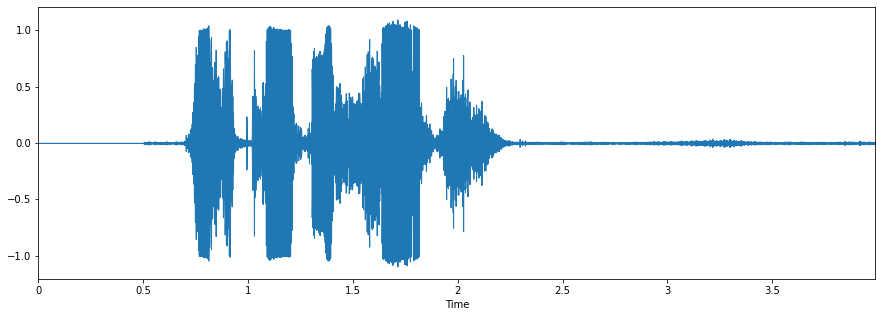

In [ ]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('/content/drive/My Drive/Project Data/All/output10.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [ ]:
livedf2= pd.DataFrame(data=livedf2)

In [ ]:
livedf2 = livedf2.stack().to_frame().T

In [ ]:
livedf2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,-18.203564,-21.471836,-22.52221,-21.712259,-22.264288,-20.707904,-21.726444,-21.76865,-24.302736,-22.250634,-19.952749,-21.589886,-22.871398,-21.074195,-22.644074,-24.456729,-21.034204,-18.204837,-15.393931,-14.683821,-16.08818,-15.269258,-10.341141,-7.561026,-7.503775,-5.26073,-2.907981,-1.810235,-8.353989,-11.253944,-11.68832,-15.03596,-17.461964,-18.240293,-17.97851,-14.96761,-15.628132,-17.499977,-19.311693,-21.082069,...,-24.037475,-23.211411,-23.118687,-23.47167,-23.638604,-23.450209,-23.264921,-22.719472,-22.148715,-22.658383,-22.888619,-23.306036,-23.30761,-24.259128,-26.32821,-26.651806,-24.688917,-25.379468,-25.825301,-25.058121,-23.847226,-25.266713,-23.488472,-22.239727,-21.664203,-22.395563,-23.064722,-23.522365,-22.248783,-22.428017,-24.273819,-24.639939,-24.929152,-24.43919,-25.210171,-24.740646,-22.311913,-22.579805,-22.31466,-21.552436


In [ ]:
twodim= np.expand_dims(livedf2, axis=2)

In [ ]:
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s 6ms/step


In [ ]:
livepreds

array([[6.5268934e-02, 2.8214222e-07, 1.2523672e-03, 1.3428419e-04,
        3.7321158e-06, 7.1877563e-01, 3.3058110e-05, 1.8717653e-01,
        2.6336199e-02, 1.0189706e-03]], dtype=float32)

In [ ]:
livepreds1=livepreds.argmax(axis=1)

In [ ]:
liveabc = livepreds1.astype(int).flatten()

In [ ]:
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions

array(['male_angry'], dtype=object)